# Using Data Of Lahore To Predict Hazard Level by determining AQI

#### Author: Saba Gul

Using Data Of Air Pollutants i-e PM 2.5, PM 10, SO2, NO, NO2 In Lahore To Predict Hazard Level By Predicting the AQI

Note: Since The data is scarce we experience overfitting

Dataset:PakEn.xls, sheet#1

### Importing Python Libraries 

In [72]:
#Import pandas, tensorflow and keras
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.python.data import Dataset
import numpy as np
import keras
from keras.utils import to_categorical
from keras import models
from keras import layers
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
from sklearn.preprocessing import MinMaxScaler
import pandas_profiling

### Reading And Visualizing Data 

In [74]:
#Read the data from excel file
df = pd.read_excel('PakEn.xlsx')

print("Column headings:")
print(df.columns)


Column headings:
Index(['Date Recorded', 'Respirable Pariculate matter (PM10)',
       'Respirable Pariculate matter (PM2.5)', 'Nitrogen Oxides as (NO)',
       'Nitrogen Oxides as (NO2)', 'SulphurDioxide (SO2)', 'AQI'],
      dtype='object')


In [75]:
df.head()

,Date Recorded,Respirable Pariculate matter (PM10),Respirable Pariculate matter (PM2.5),Nitrogen Oxides as (NO),Nitrogen Oxides as (NO2),SulphurDioxide (SO2),AQI
0,2018-03-11,80.0,59.0,7.0,14.0,39.0,1
1,2018-03-12,101.0,87.0,8.0,17.0,41.0,1
2,2018-03-13,87.0,71.0,7.0,11.0,20.0,1
3,2018-03-14,71.0,51.0,7.0,9.0,18.0,1
4,2018-03-15,64.0,47.0,7.0,8.0,20.0,0


### Data Correlation And Trends

In [76]:
pandas_profiling.ProfileReport(df)

Number of variables,7
Number of observations,104
Total Missing (%),0.0%
Total size in memory,5.8 KiB
Average record size in memory,56.8 B
Numeric,5
Categorical,0
Boolean,0
Date,1
Text (Unique),0
Rejected,1


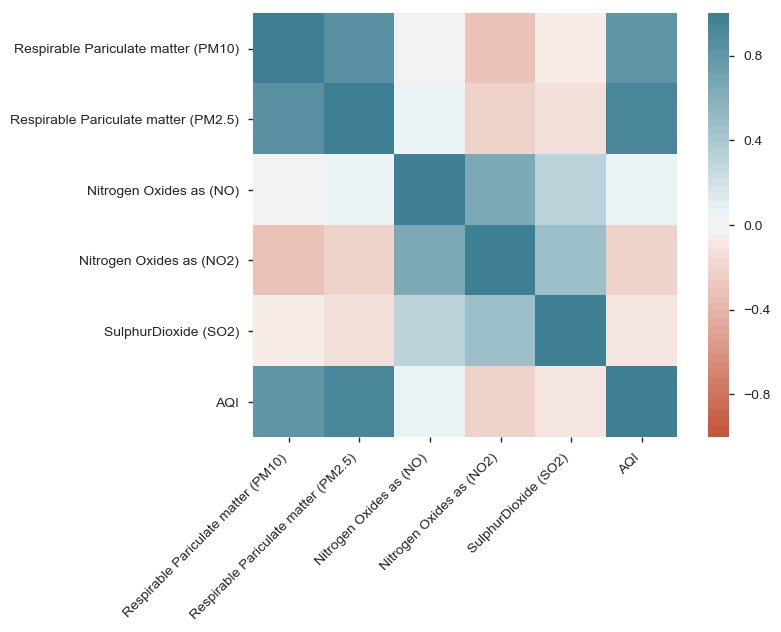

In [77]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

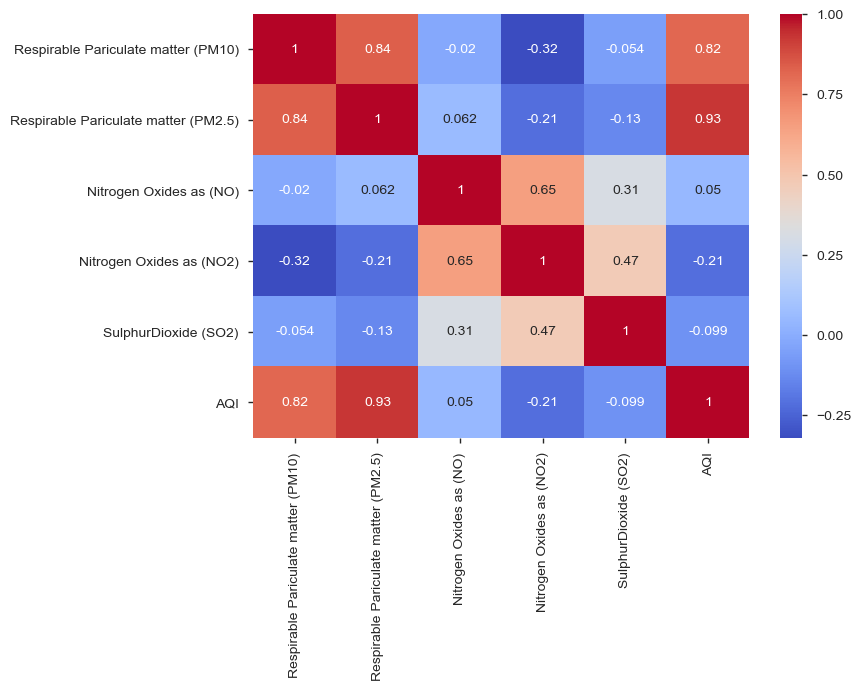

In [78]:
sns.heatmap(corr, annot=True, cmap = "coolwarm")

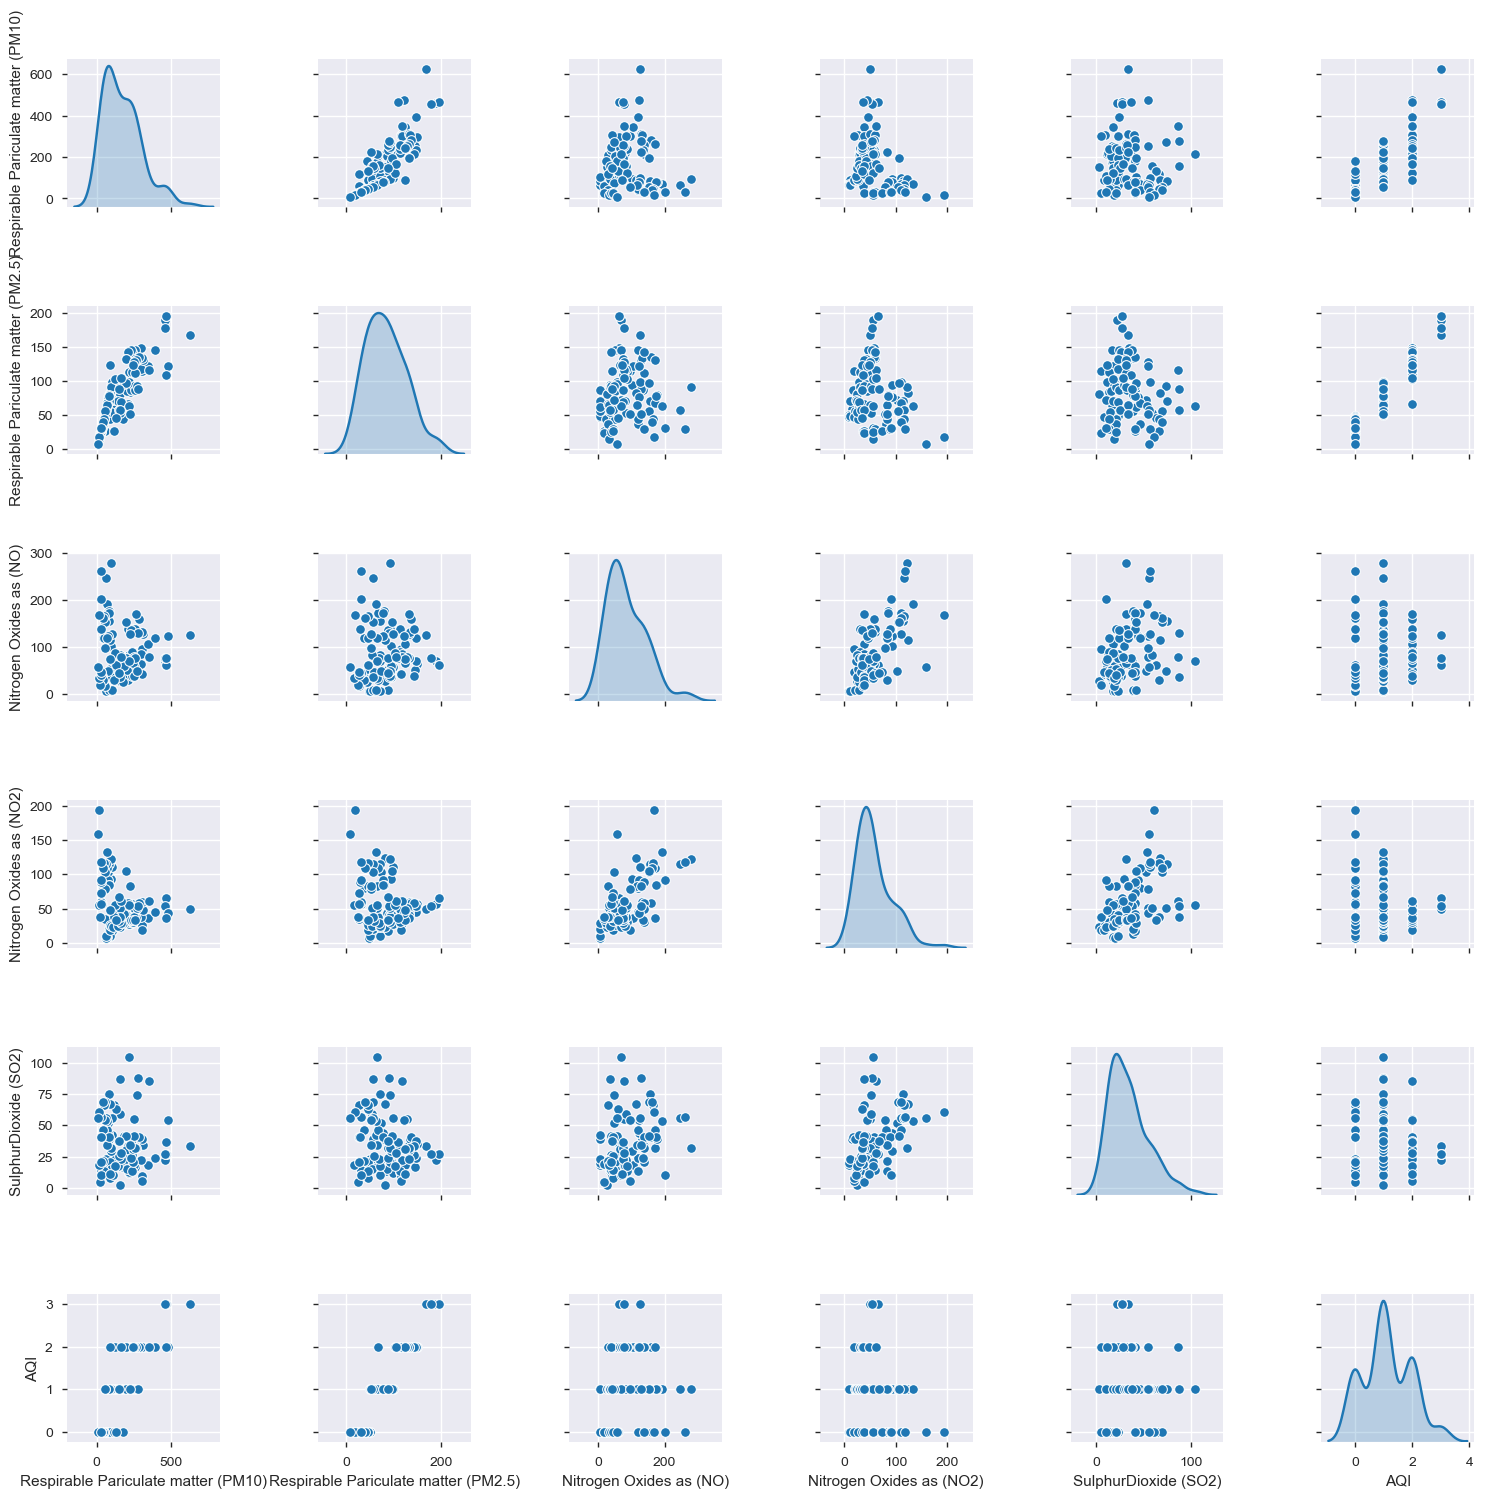

In [79]:
sns.pairplot(df[["Respirable Pariculate matter (PM10)", "Respirable Pariculate matter (PM2.5)", "Nitrogen Oxides as (NO)", "Nitrogen Oxides as (NO2)","SulphurDioxide (SO2)","AQI"]], diag_kind="kde")

C:\Users\User\.conda\envs\Terminal\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\User\.conda\envs\Terminal\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


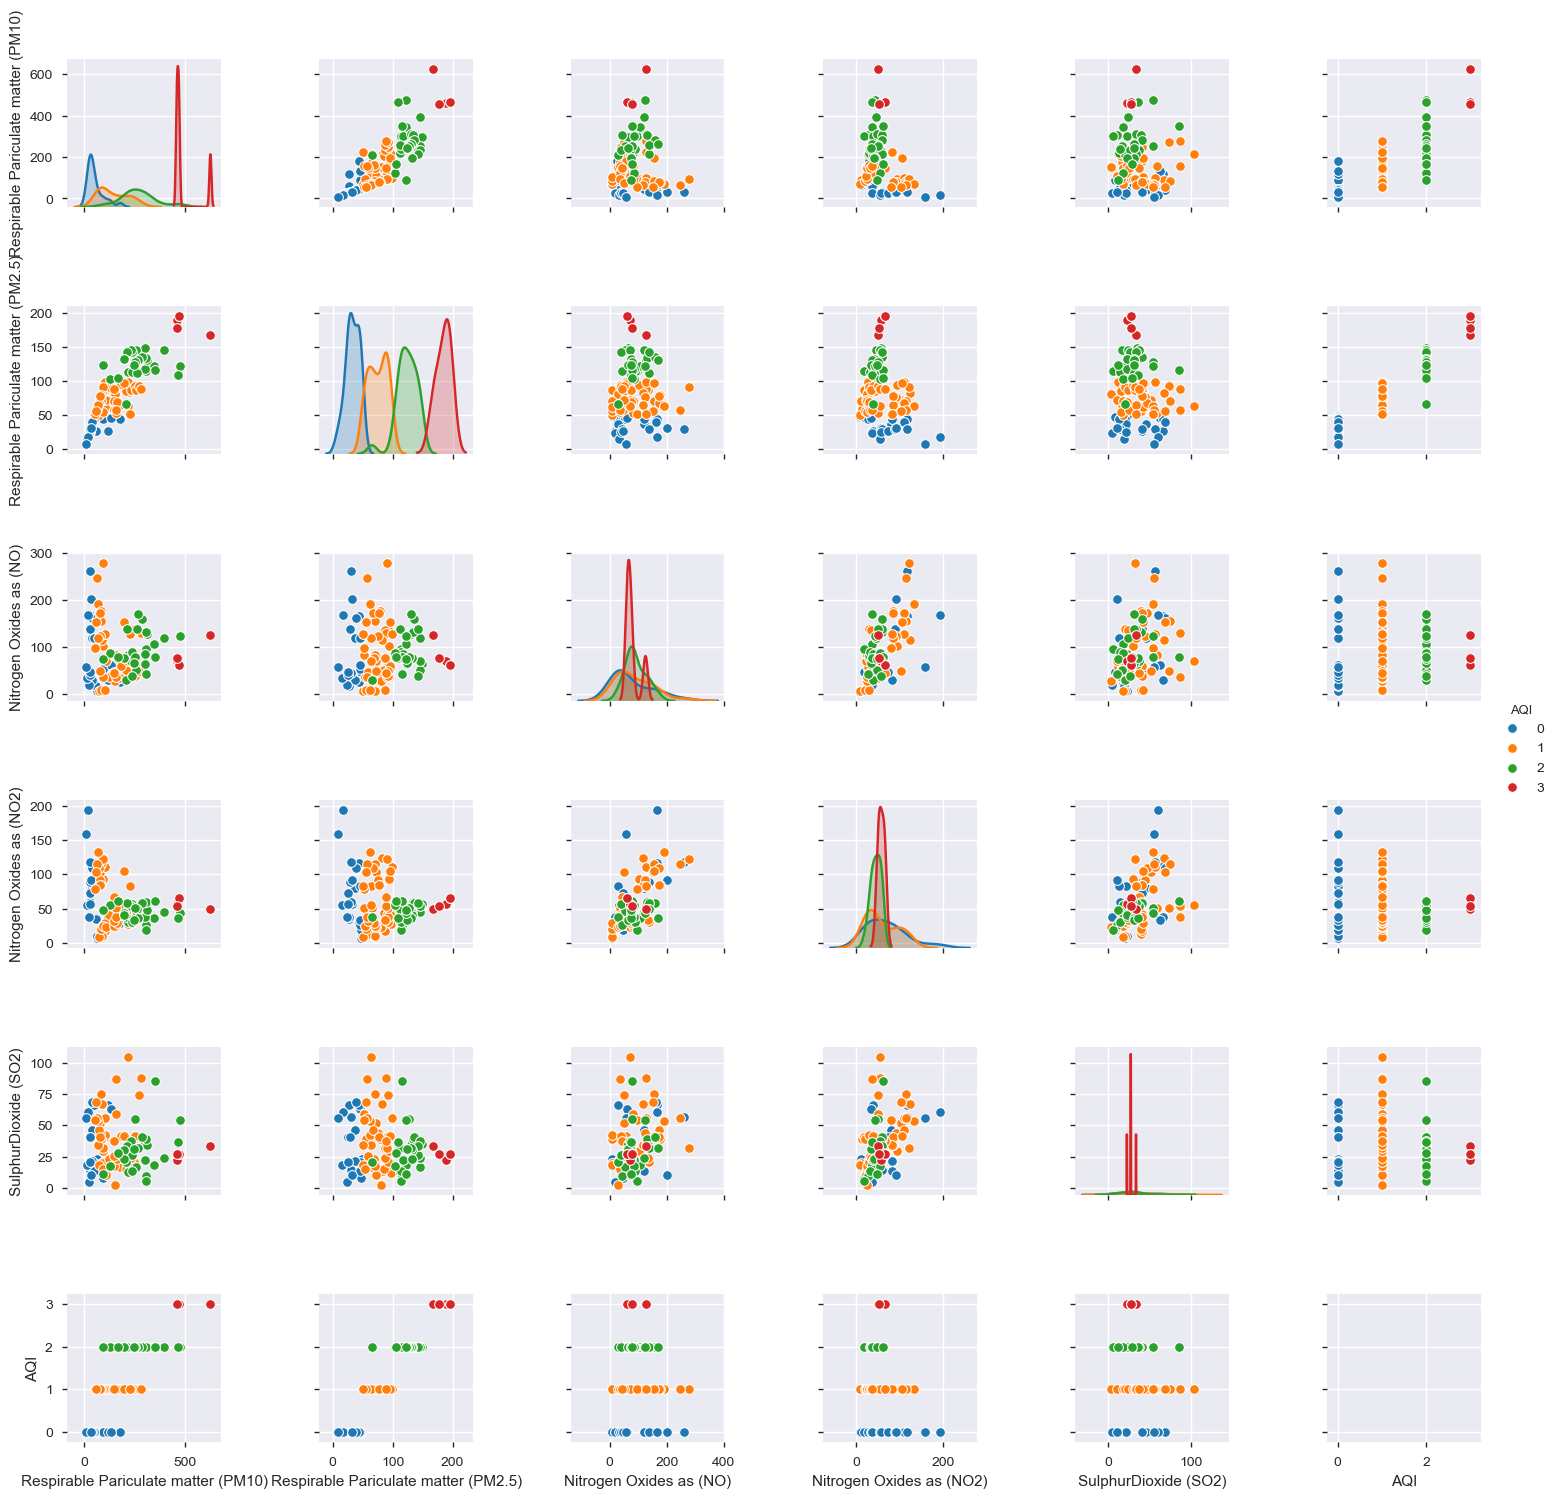

In [80]:
sns.pairplot(df[["Respirable Pariculate matter (PM10)", "Respirable Pariculate matter (PM2.5)", "Nitrogen Oxides as (NO)", "Nitrogen Oxides as (NO2)","SulphurDioxide (SO2)","AQI"]], diag_kind="kde",hue='AQI')

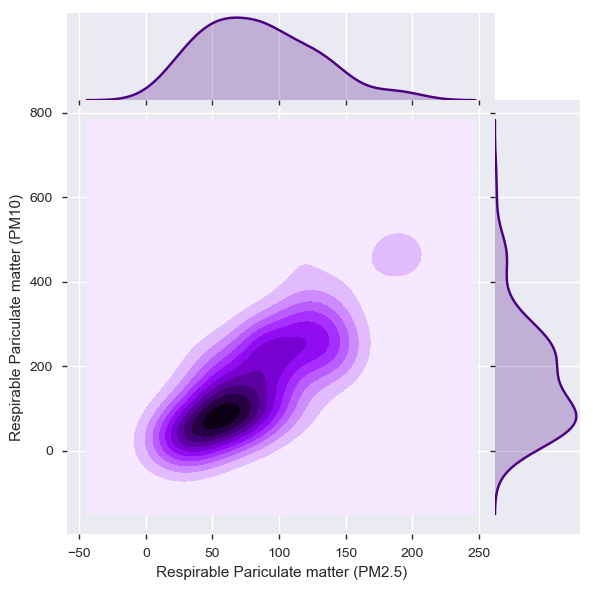

In [82]:
sns.jointplot(x='Respirable Pariculate matter (PM2.5)', y = 'Respirable Pariculate matter (PM10)', data = df, kind="kde", space=0, color="indigo")

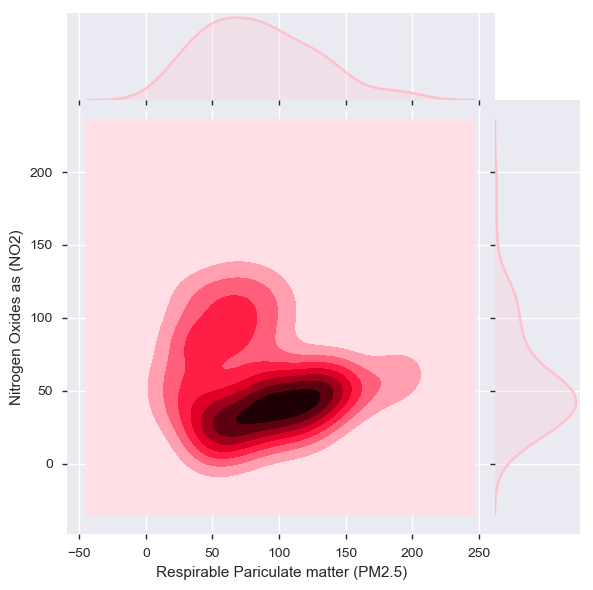

In [57]:
sns.jointplot(x='Respirable Pariculate matter (PM2.5)', y = 'Nitrogen Oxides as (NO2)', data = df, kind="kde", space=0, color="pink")

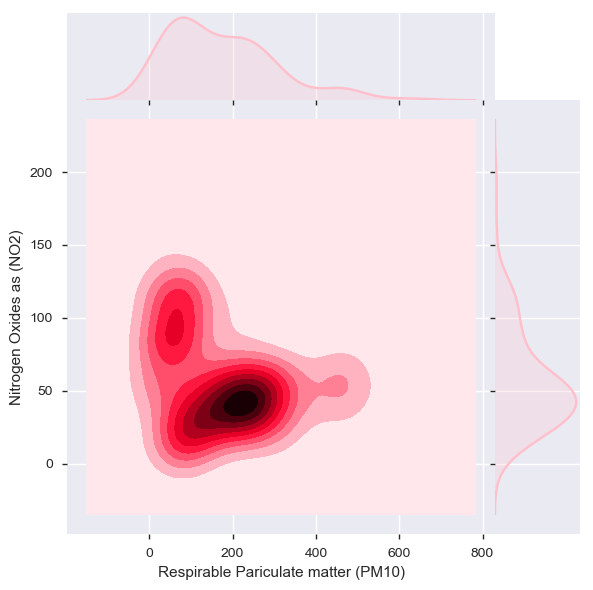

In [83]:
sns.jointplot(x='Respirable Pariculate matter (PM10)', y = 'Nitrogen Oxides as (NO2)', data = df, kind="kde", space=0, color="pink")

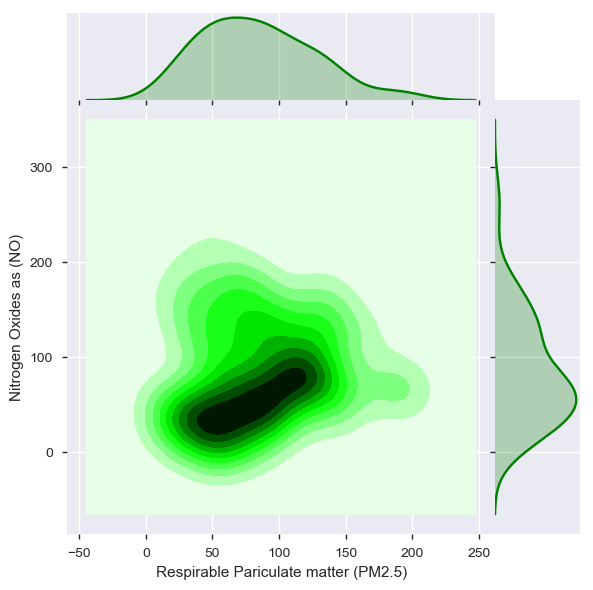

In [84]:
sns.jointplot(x='Respirable Pariculate matter (PM2.5)', y = 'Nitrogen Oxides as (NO)', data = df, kind="kde", space=0, color="green")

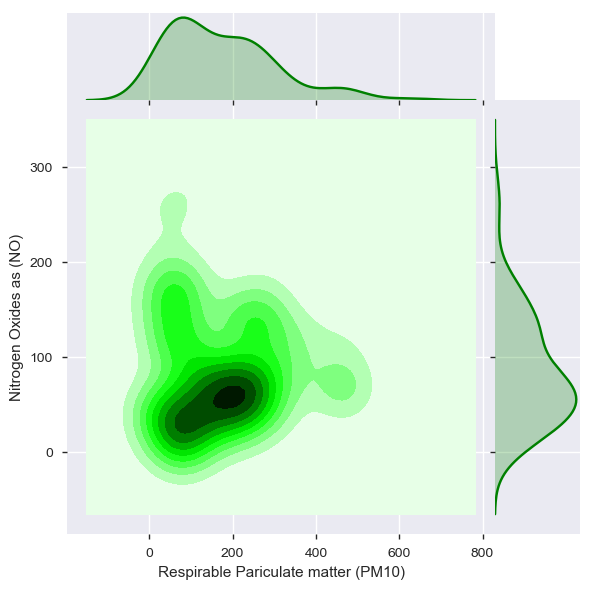

In [85]:
sns.jointplot(x='Respirable Pariculate matter (PM10)', y = 'Nitrogen Oxides as (NO)', data = df, kind="kde", space=0, color="green")

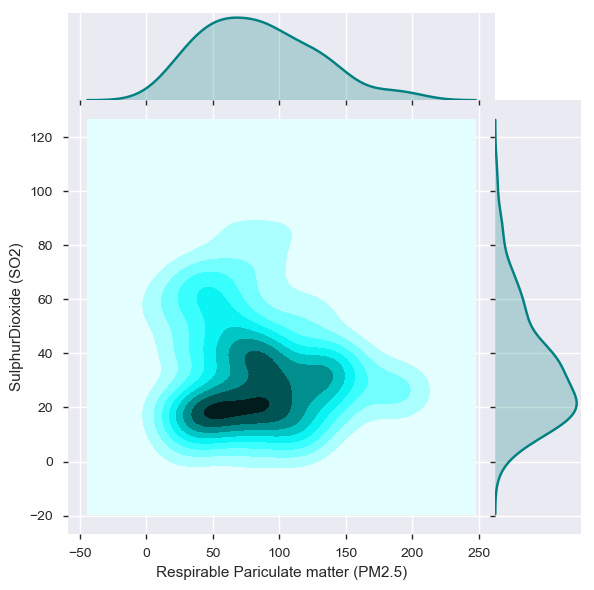

In [86]:
sns.jointplot(x='Respirable Pariculate matter (PM2.5)', y = 'SulphurDioxide (SO2)', data = df, kind="kde", space=0, color="teal")

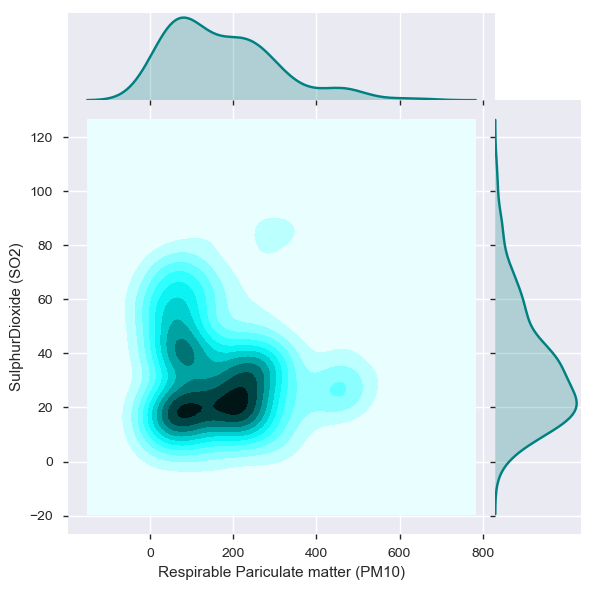

In [87]:
sns.jointplot(x='Respirable Pariculate matter (PM10)', y = 'SulphurDioxide (SO2)', data = df, kind="kde", space=0, color="teal")

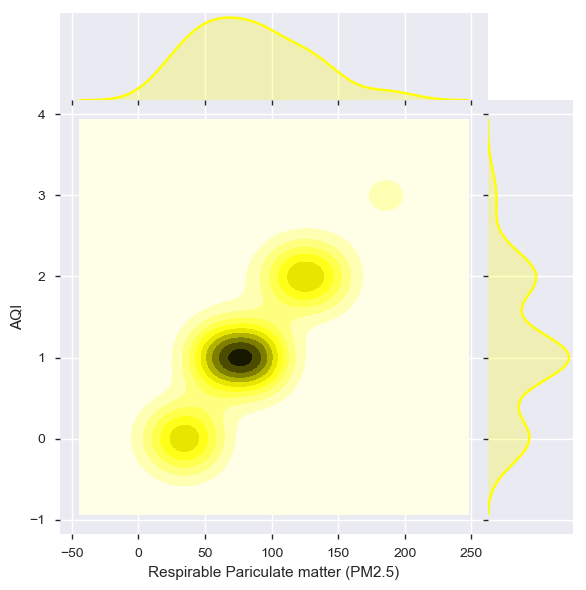

In [88]:
sns.jointplot(x='Respirable Pariculate matter (PM2.5)', y = 'AQI', data = df, kind="kde", space=0, color="yellow")

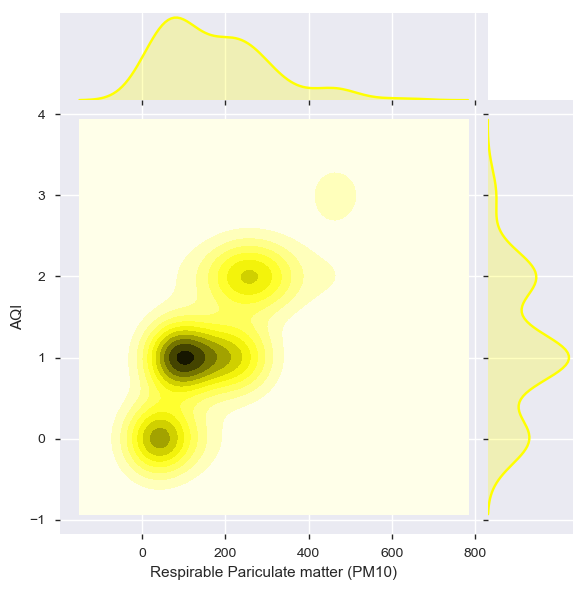

In [89]:
sns.jointplot(x='Respirable Pariculate matter (PM10)', y = 'AQI', data = df, kind="kde", space=0, color="yellow")

### Dataset Split 

In [90]:

#Select predictors
x = df[df.columns[1:6]]
#Target variable 
y = df[df.columns[6]]
#Split data into train and test 
x_train, x_test, y_train, y_test = train_test_split(x, y , train_size = 0.7, random_state =  90)


### Dataset Description

In [91]:
train_stats = x_train.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Respirable Pariculate matter (PM10),72.0,169.533403,122.357638,17.745,75.02075,138.4885,244.32575,468.097
Respirable Pariculate matter (PM2.5),72.0,83.685250,42.701506,17.545,51.76725,74.3535,110.24950,194.856
Nitrogen Oxides as (NO),72.0,77.555500,51.068626,7.000,38.31200,67.5250,119.06475,202.213
Nitrogen Oxides as (NO2),72.0,55.917681,33.196555,8.000,33.84300,48.6180,68.31475,193.263
SulphurDioxide (SO2),72.0,34.474833,20.377111,10.049,20.00000,27.1840,41.32500,104.368


### Loss And Accuracy Plot Functions

In [92]:
def plot_loss(history, title):
    plt.figure(figsize=(10,6))
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title(title)
    plt.xlabel('Nb Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    val_loss = history.history['val_loss']
    min_idx = np.argmin(val_loss)
    min_val_loss = val_loss[min_idx]
    print('Minimum validation loss of {} reached at epoch {}'.format(min_val_loss, min_idx))

In [96]:
def plot_acc(history, title):
    plt.figure(figsize=(10,6))
    plt.plot(history.history['acc'], label='Train')
    plt.plot(history.history['val_acc'], label='Validation')
    plt.title(title)
    plt.xlabel('Nb Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
    val_acc = history.history['val_acc']
    max_idx = np.argmax(val_acc)
    max_val_acc = val_acc[max_idx]
    print('Maximum validation Acc of {} reached at epoch {}'.format(max_val_acc*100, max_idx))

### Network Initialization 

In [94]:
'''As y variable is multi class categorical variable, hence using softmax as activation function and sparse-categorical cross entropy as loss function.'''
model = keras.Sequential([
 keras.layers.Dense(64, activation=tf.nn.relu,input_shape=(x_train.shape[1],)),
 keras.layers.Dense(64, activation=tf.nn.relu),
 keras.layers.Dense(4, activation=  'softmax')
 ])



### Network Testing

In [97]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history1 = model.fit(x_train, y_train, epochs= 50, batch_size = 8,validation_data = (x_test, y_test))

Train on 72 samples, validate on 32 samples
Epoch 1/50


InternalError: GPU sync failed

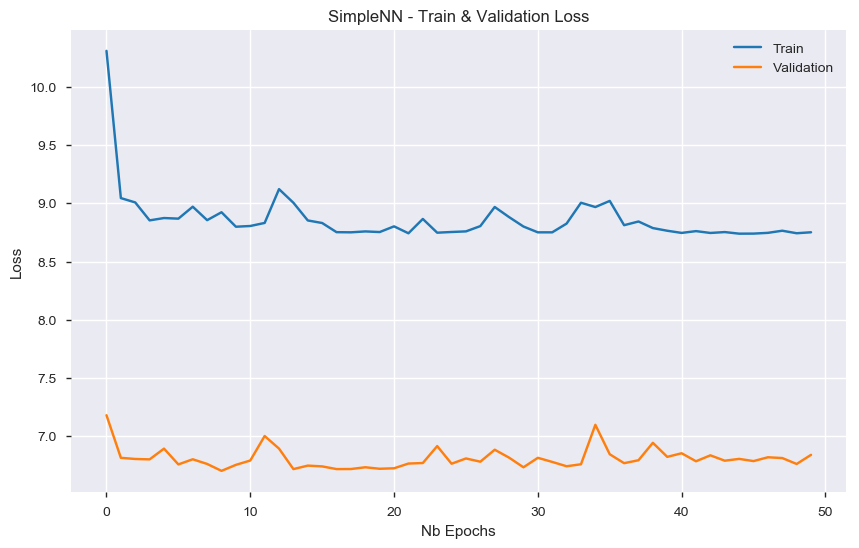

Minimum validation loss of 6.702808380126953 reached at epoch 8


In [215]:
plot_loss(history1, 'SimpleNN - Train & Validation Loss')

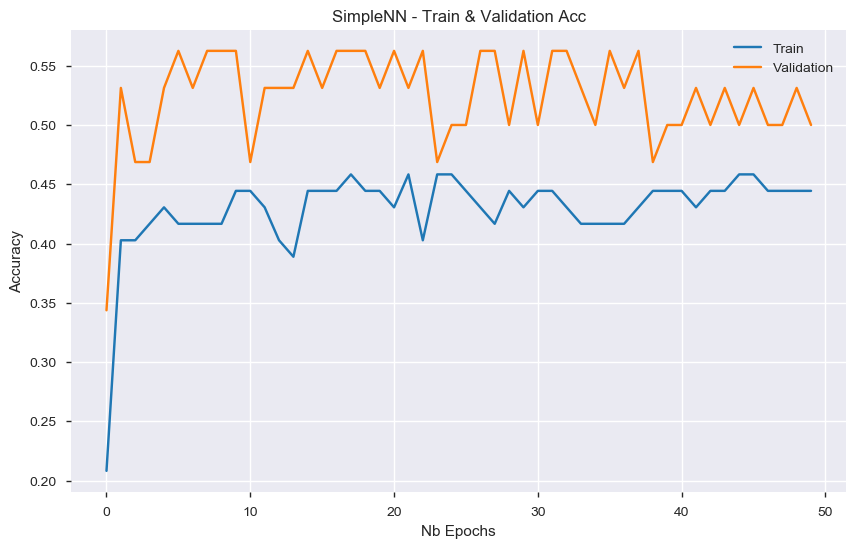

Maximum validation Acc of 0.5625 reached at epoch 5


In [216]:
plot_acc(history1, 'SimpleNN - Train & Validation Acc')

### Network#2 With Normalized Parameters

In [217]:
from sklearn import preprocessing
#Read the data from excel file
df2 = pd.read_excel('PakEn.xlsx')
#Select predictors
x = df2[df2.columns[1:6]]
#Target variable 
y = df2[df2.columns[6]]
#Split data into train and test 
x_train, x_test, y_train, y_test = train_test_split(x, y , train_size = 0.7, random_state =  90)
df2.head()


,Date Recorded,Respirable Pariculate matter (PM10),Respirable Pariculate matter (PM2.5),Nitrogen Oxides as (NO),Nitrogen Oxides as (NO2),SulphurDioxide (SO2),AQI
0,2018-03-11,80.0,59.0,7.0,14.0,39.0,1
1,2018-03-12,101.0,87.0,8.0,17.0,41.0,1
2,2018-03-13,87.0,71.0,7.0,11.0,20.0,1
3,2018-03-14,71.0,51.0,7.0,9.0,18.0,1
4,2018-03-15,64.0,47.0,7.0,8.0,20.0,0


In [218]:
#Select numerical columns which needs to be normalized
train_norm = x_train[x_train.columns[0:6]]
test_norm = x_test[x_test.columns[0:6]]

In [219]:
# Normalize Training Data 
std_scale = preprocessing.StandardScaler().fit(train_norm)
x_train_norm = std_scale.transform(train_norm)


In [220]:
#Converting numpy array to dataframe
training_norm_col = pd.DataFrame(x_train_norm, index=train_norm.index, columns=train_norm.columns) 
x_train.update(training_norm_col)
print (x_train.head())


C:\Users\User\.conda\envs\Terminal\lib\site-packages\pandas\core\frame.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)


    Respirable Pariculate matter (PM10)  Respirable Pariculate matter (PM2.5)  \
47                            -0.185955                             -0.597875   
27                             2.378632                              2.225825   
3                             -0.810941                             -0.770807   
20                             0.315185                             -0.420745   
89                            -1.067968                             -1.042975   

    Nitrogen Oxides as (NO)  Nitrogen Oxides as (NO2)  SulphurDioxide (SO2)  
47                -0.616522                 -0.714289             -0.446048  
27                -0.010836                 -0.075191             -0.372315  
3                 -1.391278                 -1.423248             -0.814171  
20                -0.934962                 -0.555424             -0.692501  
89                 1.656063                  1.622568              1.698442  


In [221]:
# Normalize Testing Data by using mean and SD of training set
x_test_norm = std_scale.transform(test_norm)
testing_norm_col = pd.DataFrame(x_test_norm, index=test_norm.index, columns=test_norm.columns) 
x_test.update(testing_norm_col)
print (x_train.head())

C:\Users\User\.conda\envs\Terminal\lib\site-packages\pandas\core\frame.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)


    Respirable Pariculate matter (PM10)  Respirable Pariculate matter (PM2.5)  \
47                            -0.185955                             -0.597875   
27                             2.378632                              2.225825   
3                             -0.810941                             -0.770807   
20                             0.315185                             -0.420745   
89                            -1.067968                             -1.042975   

    Nitrogen Oxides as (NO)  Nitrogen Oxides as (NO2)  SulphurDioxide (SO2)  
47                -0.616522                 -0.714289             -0.446048  
27                -0.010836                 -0.075191             -0.372315  
3                 -1.391278                 -1.423248             -0.814171  
20                -0.934962                 -0.555424             -0.692501  
89                 1.656063                  1.622568              1.698442  


In [222]:
#Build neural network model with normalized data
model = keras.Sequential([
 keras.layers.Dense(64, activation=tf.nn.relu,                  
 input_shape=(x_train.shape[1],)),
 keras.layers.Dense(8, activation=tf.nn.relu),
 keras.layers.Dense(4, activation=  'softmax')
 ])

model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history2 = model.fit(
 x_train, y_train,
 epochs= 13, batch_size = 8,
 validation_data = (x_test, y_test))


Train on 72 samples, validate on 32 samples
Epoch 1/13
72/72 [==============================] - 1s 18ms/step - loss: 1.4467 - acc: 0.2222 - val_loss: 1.4323 - val_acc: 0.2188
Epoch 2/13
72/72 [==============================] - 0s 443us/step - loss: 1.3958 - acc: 0.3056 - val_loss: 1.3823 - val_acc: 0.4062
Epoch 3/13
72/72 [==============================] - 0s 443us/step - loss: 1.3628 - acc: 0.4444 - val_loss: 1.3488 - val_acc: 0.4688
Epoch 4/13
72/72 [==============================] - 0s 513us/step - loss: 1.3368 - acc: 0.5833 - val_loss: 1.3209 - val_acc: 0.6250
Epoch 5/13
72/72 [==============================] - 0s 471us/step - loss: 1.3175 - acc: 0.6250 - val_loss: 1.2890 - val_acc: 0.7500
Epoch 6/13
72/72 [==============================] - 0s 471us/step - loss: 1.2993 - acc: 0.6806 - val_loss: 1.2545 - val_acc: 0.7812
Epoch 7/13
72/72 [==============================] - 0s 456us/step - loss: 1.2742 - acc: 0.6528 - val_loss: 1.2227 - val_acc: 0.7500
Epoch 8/13
72/72 [===============

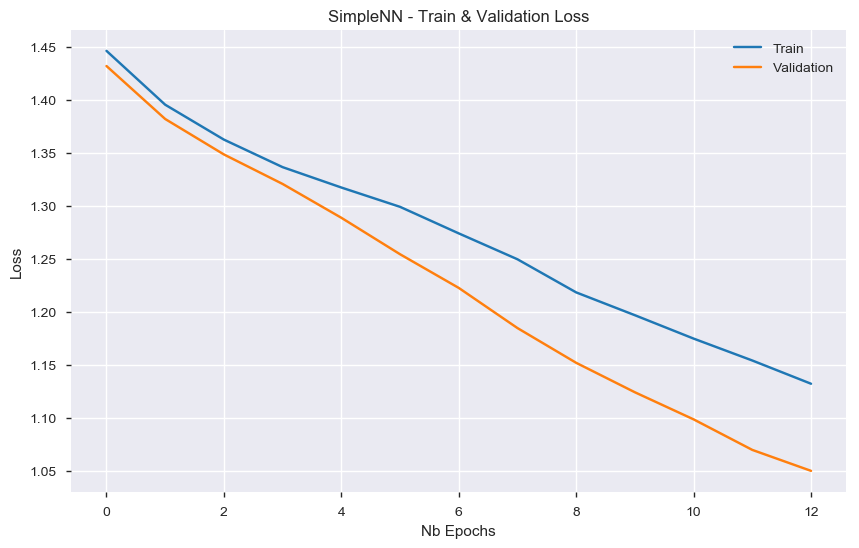

Minimum validation loss of 1.0498603284358978 reached at epoch 12


In [223]:
plot_loss(history2, 'SimpleNN - Train & Validation Loss')

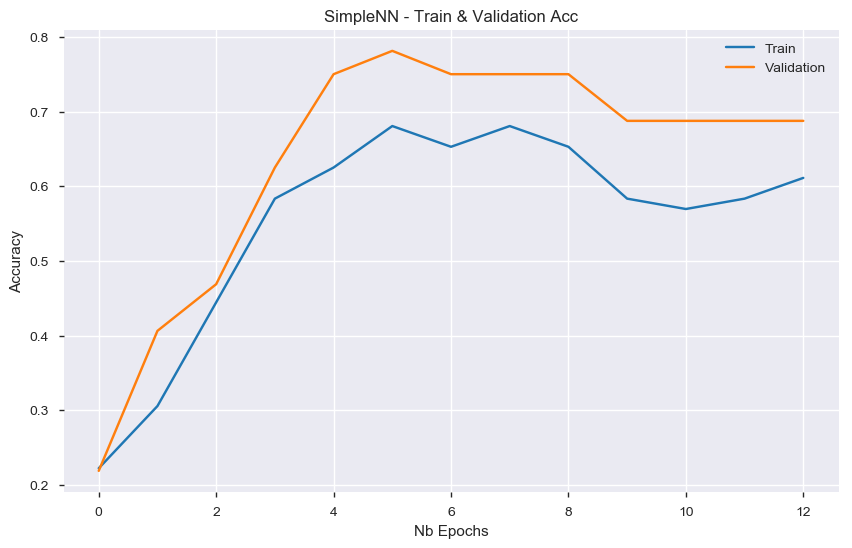

Maximum validation Acc of 0.78125 reached at epoch 5


In [224]:
plot_acc(history2, 'SimpleNN - Train & Validation Acc')

### Network#3 With Early Stopping

In [227]:
#Read the data from excel file
df3 = pd.read_excel('PakEn.xlsx')

print("Column headings:")
print(df3.columns)

Column headings:
Index(['Date Recorded', 'Respirable Pariculate matter (PM10)',
       'Respirable Pariculate matter (PM2.5)', 'Nitrogen Oxides as (NO)',
       'Nitrogen Oxides as (NO2)', 'SulphurDioxide (SO2)', 'AQI'],
      dtype='object')


In [228]:
from sklearn import preprocessing
#Read the data from excel file
df3 = pd.read_excel('PakEn.xlsx')
#Select predictors
x = df3[df3.columns[1:6]]
#Target variable 
y = df3[df3.columns[6]]
#Split data into train and test 
x_train, x_test, y_train, y_test = train_test_split(x, y , train_size = 0.7, random_state =  90)
df2.head()

,Date Recorded,Respirable Pariculate matter (PM10),Respirable Pariculate matter (PM2.5),Nitrogen Oxides as (NO),Nitrogen Oxides as (NO2),SulphurDioxide (SO2),AQI
0,2018-03-11,80.0,59.0,7.0,14.0,39.0,1
1,2018-03-12,101.0,87.0,8.0,17.0,41.0,1
2,2018-03-13,87.0,71.0,7.0,11.0,20.0,1
3,2018-03-14,71.0,51.0,7.0,9.0,18.0,1
4,2018-03-15,64.0,47.0,7.0,8.0,20.0,0


In [229]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
x_train_norm = scaler.fit_transform(x_train)
#valid = scaler.transform(valid)
x_test_norm = scaler.transform(x_test)

In [230]:
#Converting numpy array to dataframe
training_norm_col = pd.DataFrame(x_train_norm, index=x_train.index, columns=x_train.columns) 
x_train.update(training_norm_col)
print (x_train.head())

C:\Users\User\.conda\envs\Terminal\lib\site-packages\pandas\core\frame.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)


    Respirable Pariculate matter (PM10)  Respirable Pariculate matter (PM2.5)  \
47                             0.286873                              0.230036   
27                             0.978799                              0.905325   
3                              0.118252                              0.188680   
20                             0.422081                              0.272397   
89                             0.048906                              0.123591   

    Nitrogen Oxides as (NO)  Nitrogen Oxides as (NO2)  SulphurDioxide (SO2)  
47                 0.201267                  0.131548              0.163276  
27                 0.358613                  0.245268              0.179094  
3                  0.000000                  0.005398              0.084299  
20                 0.118542                  0.159816              0.110402  
89                 0.791643                  0.547362              0.623353  


In [247]:
x_train.index

Int64Index([ 47,  27,   3,  20,  89,  23,  55,  34,  88,  71,  97,  46, 103,
             38,  42,  11,  19,  54,  43,  63,  83,  59,  33,  45,  61,   1,
             72,  13,  44,   6,  22,   7,  32,  56,  65,  50,  79,  73,  28,
             40,   2,  66, 101,  14,  92,  75,  70,  48,  87,  26,   4,  12,
             10,  86,   0,   9,  82,  77,  95,  80,  30,  51,  74,  18,  37,
             58,  68,  39,  67,  31,  29,  91],
           dtype='int64')

In [231]:
#Converting numpy array to dataframe
testing_norm_col = pd.DataFrame(x_test_norm, index=x_test.index, columns=x_test.columns) 
x_test.update(testing_norm_col)
print (x_test.head())

    Respirable Pariculate matter (PM10)  Respirable Pariculate matter (PM2.5)  \
84                             0.107161                              0.264107   
49                             0.536041                              0.532759   
60                             0.566124                              0.421914   
64                             0.308437                              0.222434   
99                             0.463484                              0.190406   

    Nitrogen Oxides as (NO)  Nitrogen Oxides as (NO2)  SulphurDioxide (SO2)  
84                 0.569311                  0.408803              0.253459  
49                 0.666662                  0.224589              0.227780  
60                 0.214473                  0.230893              0.677743  
64                 0.148704                  0.158963              0.817046  
99                 0.621347                  0.406881              0.253152  


In [232]:
x_train.to_excel('..train.xlsx')


In [233]:
y_train.to_csv('..ytrain.csv')

C:\Users\User\.conda\envs\Terminal\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [235]:
x_test.to_csv('..test.csv')

In [236]:
y_test.to_csv('..ytest.csv')

C:\Users\User\.conda\envs\Terminal\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [240]:
#Build neural network model with normalized data
model = keras.Sequential([
 keras.layers.Dense(64, activation=tf.nn.relu,                  
 input_shape=(x_train.shape[1],)),
 keras.layers.Dense(8, activation=tf.nn.relu),
 keras.layers.Dense(4, activation=  'softmax')
 ])

model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
earlystopper = EarlyStopping(monitor='val_loss'
                             , patience=3
                             , verbose=0)
history3 = model.fit(
 x_train, y_train,
 epochs= 50, batch_size = 20,
 validation_data = (x_test, y_test), callbacks=[earlystopper])


Train on 72 samples, validate on 32 samples
Epoch 1/50
72/72 [==============================] - 1s 18ms/step - loss: 1.4069 - acc: 0.2361 - val_loss: 1.4060 - val_acc: 0.2188
Epoch 2/50
72/72 [==============================] - 0s 222us/step - loss: 1.3812 - acc: 0.2222 - val_loss: 1.3748 - val_acc: 0.1250
Epoch 3/50
72/72 [==============================] - 0s 249us/step - loss: 1.3567 - acc: 0.3056 - val_loss: 1.3500 - val_acc: 0.1875
Epoch 4/50
72/72 [==============================] - 0s 235us/step - loss: 1.3381 - acc: 0.3750 - val_loss: 1.3273 - val_acc: 0.3125
Epoch 5/50
72/72 [==============================] - 0s 249us/step - loss: 1.3240 - acc: 0.4306 - val_loss: 1.3080 - val_acc: 0.3750
Epoch 6/50
72/72 [==============================] - 0s 249us/step - loss: 1.3088 - acc: 0.4444 - val_loss: 1.2923 - val_acc: 0.3125
Epoch 7/50
72/72 [==============================] - 0s 263us/step - loss: 1.2955 - acc: 0.4722 - val_loss: 1.2780 - val_acc: 0.3438
Epoch 8/50
72/72 [===============

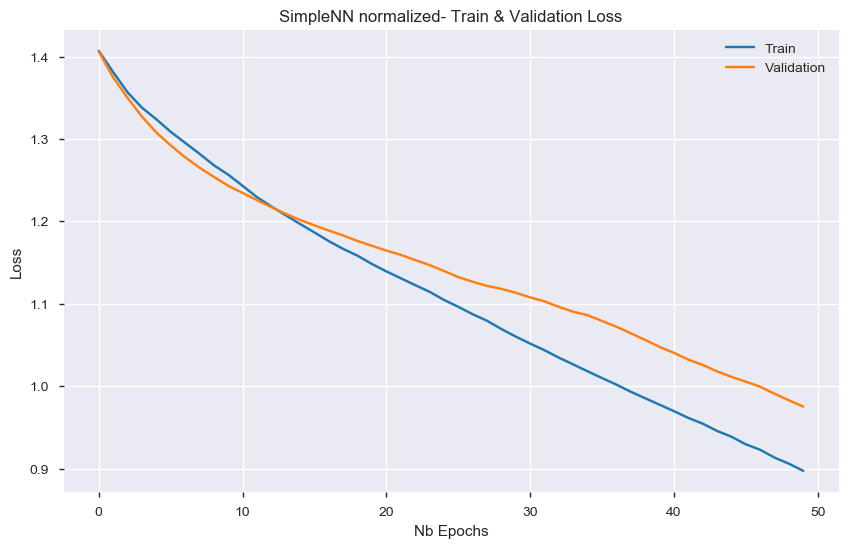

Minimum validation loss of 0.975332036614418 reached at epoch 49


In [241]:
plot_loss(history3, 'SimpleNN normalized- Train & Validation Loss')

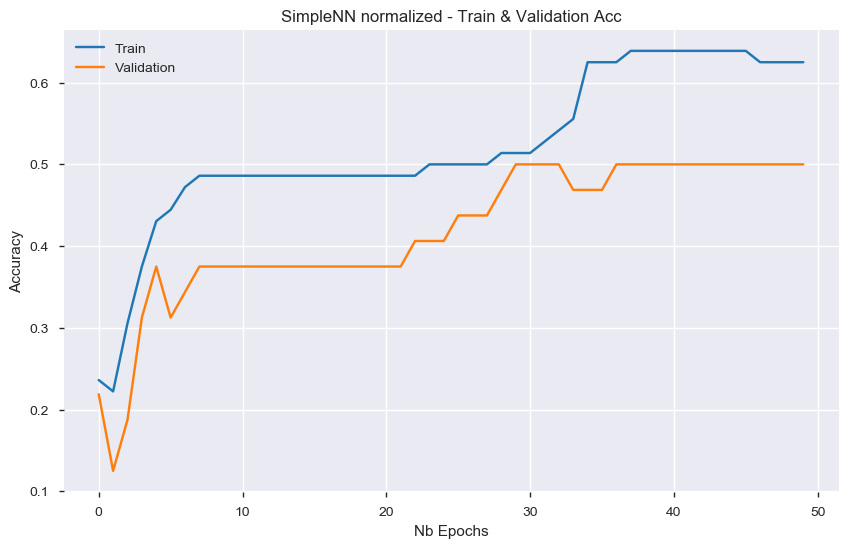

Maximum validation Acc of 0.5 reached at epoch 29


In [242]:
plot_acc(history3, 'SimpleNN normalized - Train & Validation Acc')

In [243]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
x_norm = scaler.fit_transform(x)


In [244]:
#Converting numpy array to dataframe
x_norm_col = pd.DataFrame(x_norm, index=x.index, columns=x.columns) 
x.update(x_norm_col)
print (x.head())

C:\Users\User\.conda\envs\Terminal\lib\site-packages\pandas\core\frame.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)


   Respirable Pariculate matter (PM10)  Respirable Pariculate matter (PM2.5)  \
0                             0.116033                              0.271378   
1                             0.150148                              0.421547   
2                             0.127405                              0.335736   
3                             0.101413                              0.228472   
4                             0.090041                              0.207019   

   Nitrogen Oxides as (NO)  Nitrogen Oxides as (NO2)  SulphurDioxide (SO2)  
0                 0.000000                  0.032386              0.357689  
1                 0.003695                  0.048580              0.377341  
2                 0.000000                  0.016193              0.170993  
3                 0.000000                  0.005398              0.151341  
4                 0.000000                  0.000000              0.170993  


In [245]:
x.to_excel('..x.xlsx')

In [ ]:
y.to_excel('..y.xlsx')